1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%matplotlib inline

!pip install geopandas
import pandas as pd
import geopandas
!pip install contextily
import contextily as ctx


In [13]:
italy = geopandas.read_file('/content/drive/MyDrive/Geopandas/Reg01012021_g.zip')
italy

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


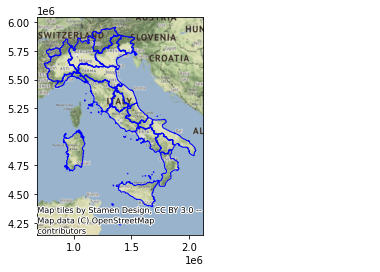

In [14]:
ax = italy.to_crs(epsg=3857).plot(edgecolor='b',facecolor='none')
ctx.add_basemap(ax)

2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa (https://contextily.readthedocs.io/en/latest/providers_deepdive.html)


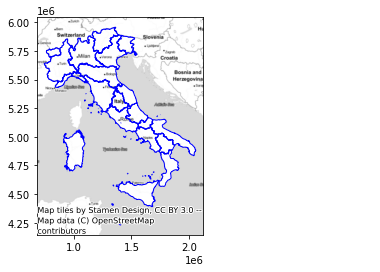

In [15]:
ax = italy.to_crs(epsg=3857).plot(edgecolor='b',facecolor='none')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

3. visualizzare le province della Lombardia su una mappa di contextily


In [16]:
prov = geopandas.read_file('/content/drive/MyDrive/Geopandas/ProvCM01012021_g.zip')
prov

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


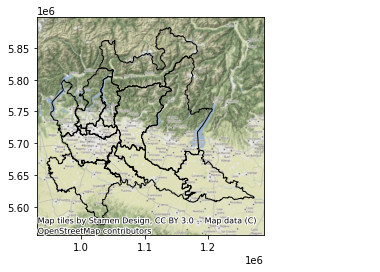

In [17]:
prov = geopandas.read_file('/content/drive/MyDrive/Geopandas/ProvCM01012021_g.zip')
ax = prov[prov['COD_REG']== 3].to_crs(3857).plot(edgecolor='k',facecolor='none')
ctx.add_basemap(ax)

4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti


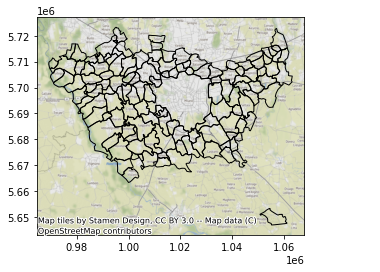

In [18]:
import matplotlib.pyplot as plt
districts = geopandas.read_file('/content/drive/MyDrive/Geopandas/Com01012021_g.zip')
milano = prov[prov.DEN_UTS == 'Milano']
comuni_mil = districts[districts.within(milano.geometry.squeeze())]
ax = comuni_mil.to_crs(3857).plot(edgecolor='k',facecolor='none')
ctx.add_basemap(ax)

5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri. 


In [19]:
prov_milano = prov.loc[prov['DEN_CM'] == 'Milano']
com_milano = districts.loc[districts['COMUNE']== 'Milano']
ax = prov_milano.to_crs(epsg=3857).plot(ax=ax, edgecolor='k',facecolor='none', figsize=(15,10))
com_milano.to_crs(epsg=3857).plot(ax=ax, edgecolor='k',facecolor='none')
districts.to_crs(epsg=3857).plot(ax=ax, edgecolor='k',facecolor='none')
ctx.add_basemap(ax)

<Figure size 432x288 with 0 Axes>

6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.
